In [376]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score,accuracy_score, homogeneity_score,silhouette_samples,completeness_score
from sklearn.mixture import GaussianMixture
import time
import numpy as np
import warnings
import matplotlib.cm as cm
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.random_projection import GaussianRandomProjection
import scipy
import scipy.stats
from scipy.linalg import pinv
from sklearn.linear_model import RidgeCV
seed = 6
ds_name = "BankChurn"

## BankChurn

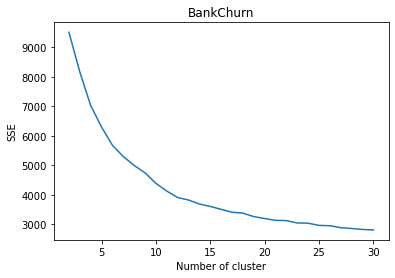

In [377]:
df_bank_churn = pd.read_csv('bankchurn.csv')

#clean ups
df_bank_churn = df_bank_churn.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bank_churn['Gender'] = df_bank_churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 2 if x== 'Germany' else x)


target_column = ['Exited'] 
predictors = list(set(list(df_bank_churn.columns))-set(target_column))
df_bank_churn[predictors] = df_bank_churn[predictors]/df_bank_churn[predictors].max()

X = df_bank_churn[predictors].values
#y = df_bank_churn[target_column].values

y = df_bank_churn['Exited'].copy().values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

clusters = list(range(2,31,1))

sse = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.title(ds_name)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


For n_clusters=2, The Silhouette Coefficient is 0.20819117591532257
For n_clusters=2, The homogeneity_score is 0.024316028117493612
For n_clusters=3, The Silhouette Coefficient is 0.19903303898825053
For n_clusters=3, The homogeneity_score is 0.023287933891536924
For n_clusters=4, The Silhouette Coefficient is 0.2568541210112327
For n_clusters=4, The homogeneity_score is 0.03506737600356141
For n_clusters=5, The Silhouette Coefficient is 0.24459118706141936
For n_clusters=5, The homogeneity_score is 0.033756518630935435
For n_clusters=6, The Silhouette Coefficient is 0.27051132230627556
For n_clusters=6, The homogeneity_score is 0.03279949171146341
For n_clusters=7, The Silhouette Coefficient is 0.293980952797538
For n_clusters=7, The homogeneity_score is 0.03425082661928536
For n_clusters=8, The Silhouette Coefficient is 0.26242556282978297
For n_clusters=8, The homogeneity_score is 0.03601177041269855
For n_clusters=9, The Silhouette Coefficient is 0.254569685645798
For n_clusters=9,

Text(0, 0.5, 'Silhouette Coefficient')

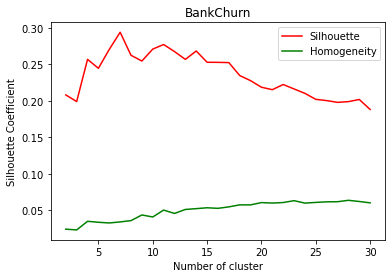

In [136]:
silh = {}
homog = {}
adj = {}
for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name)
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

For n_clusters = 2 The average silhouette_score is : 0.20819117591532257
homogeneity_score is 0.024316028117493612
For n_clusters = 8 The average silhouette_score is : 0.2690189171852343
homogeneity_score is 0.045346356389711066
For n_clusters = 14 The average silhouette_score is : 0.2713061754293735
homogeneity_score is 0.052243097593257584
For n_clusters = 16 The average silhouette_score is : 0.2526533322579646
homogeneity_score is 0.05311955180600618
For n_clusters = 20 The average silhouette_score is : 0.22785597728766724
homogeneity_score is 0.05911907906683643


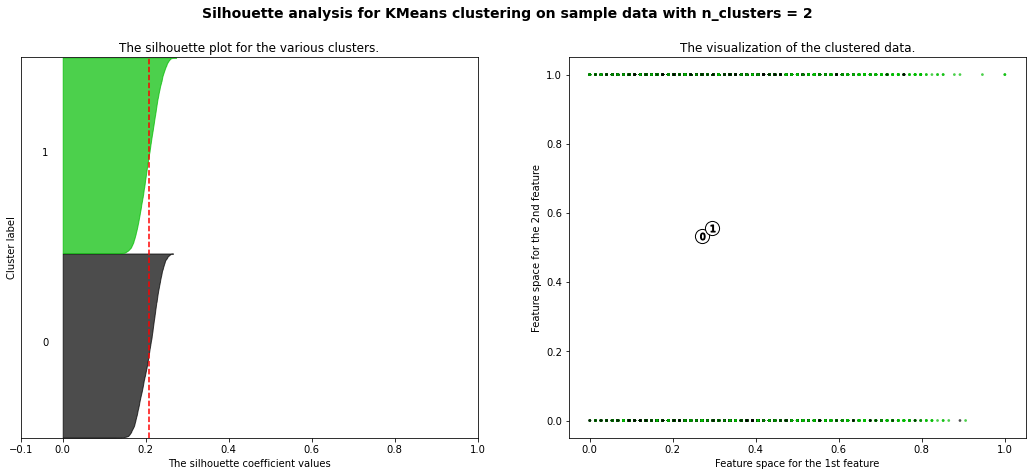

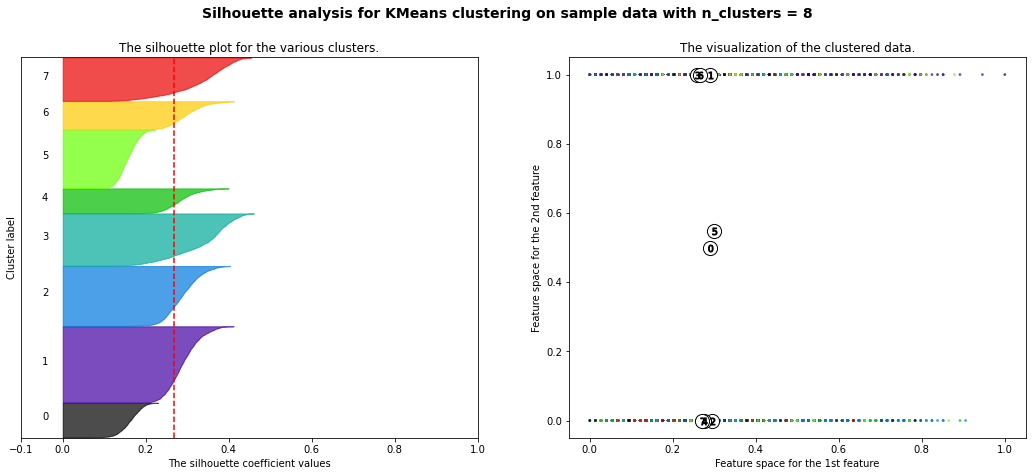

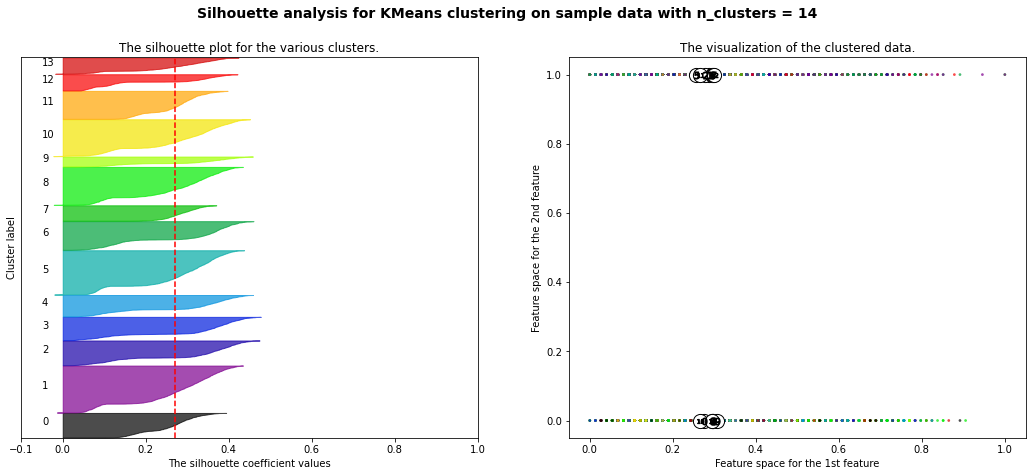

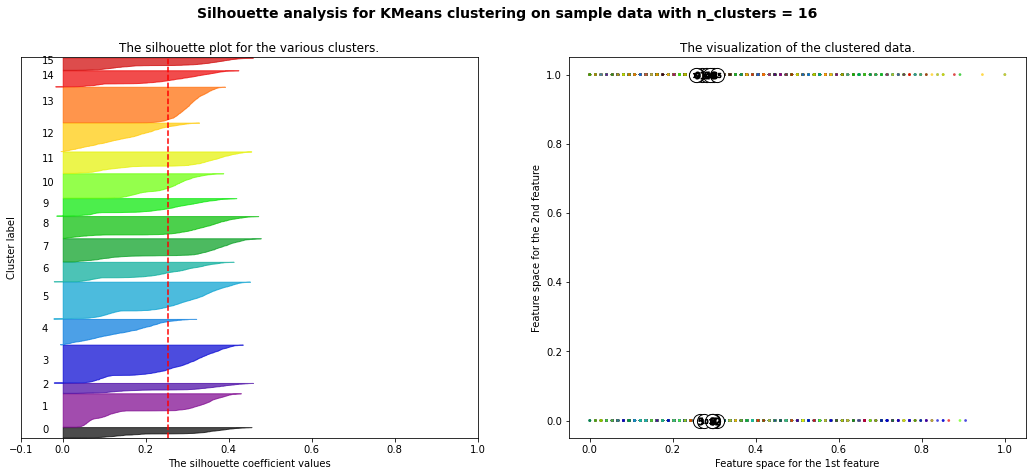

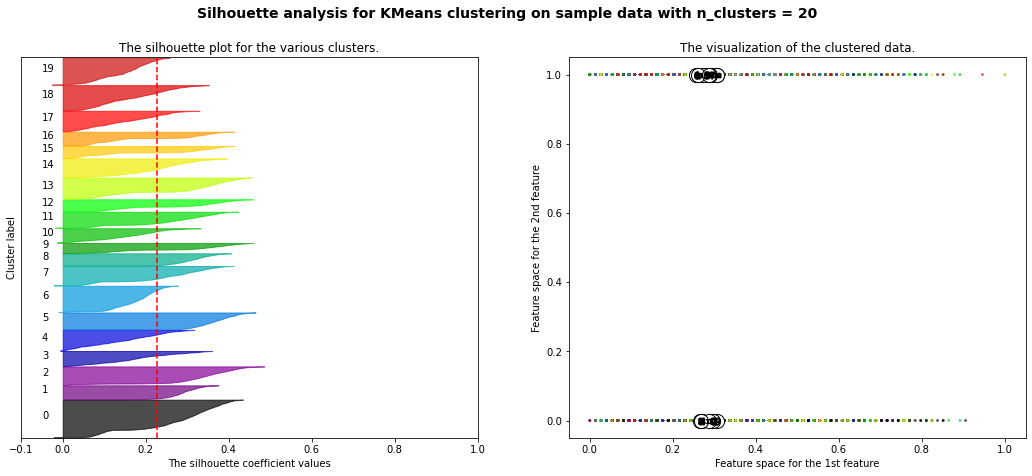

In [97]:
range_n_clusters = [2,8,14,16,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    hom = homogeneity_score(y, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print("homogeneity_score is", hom)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

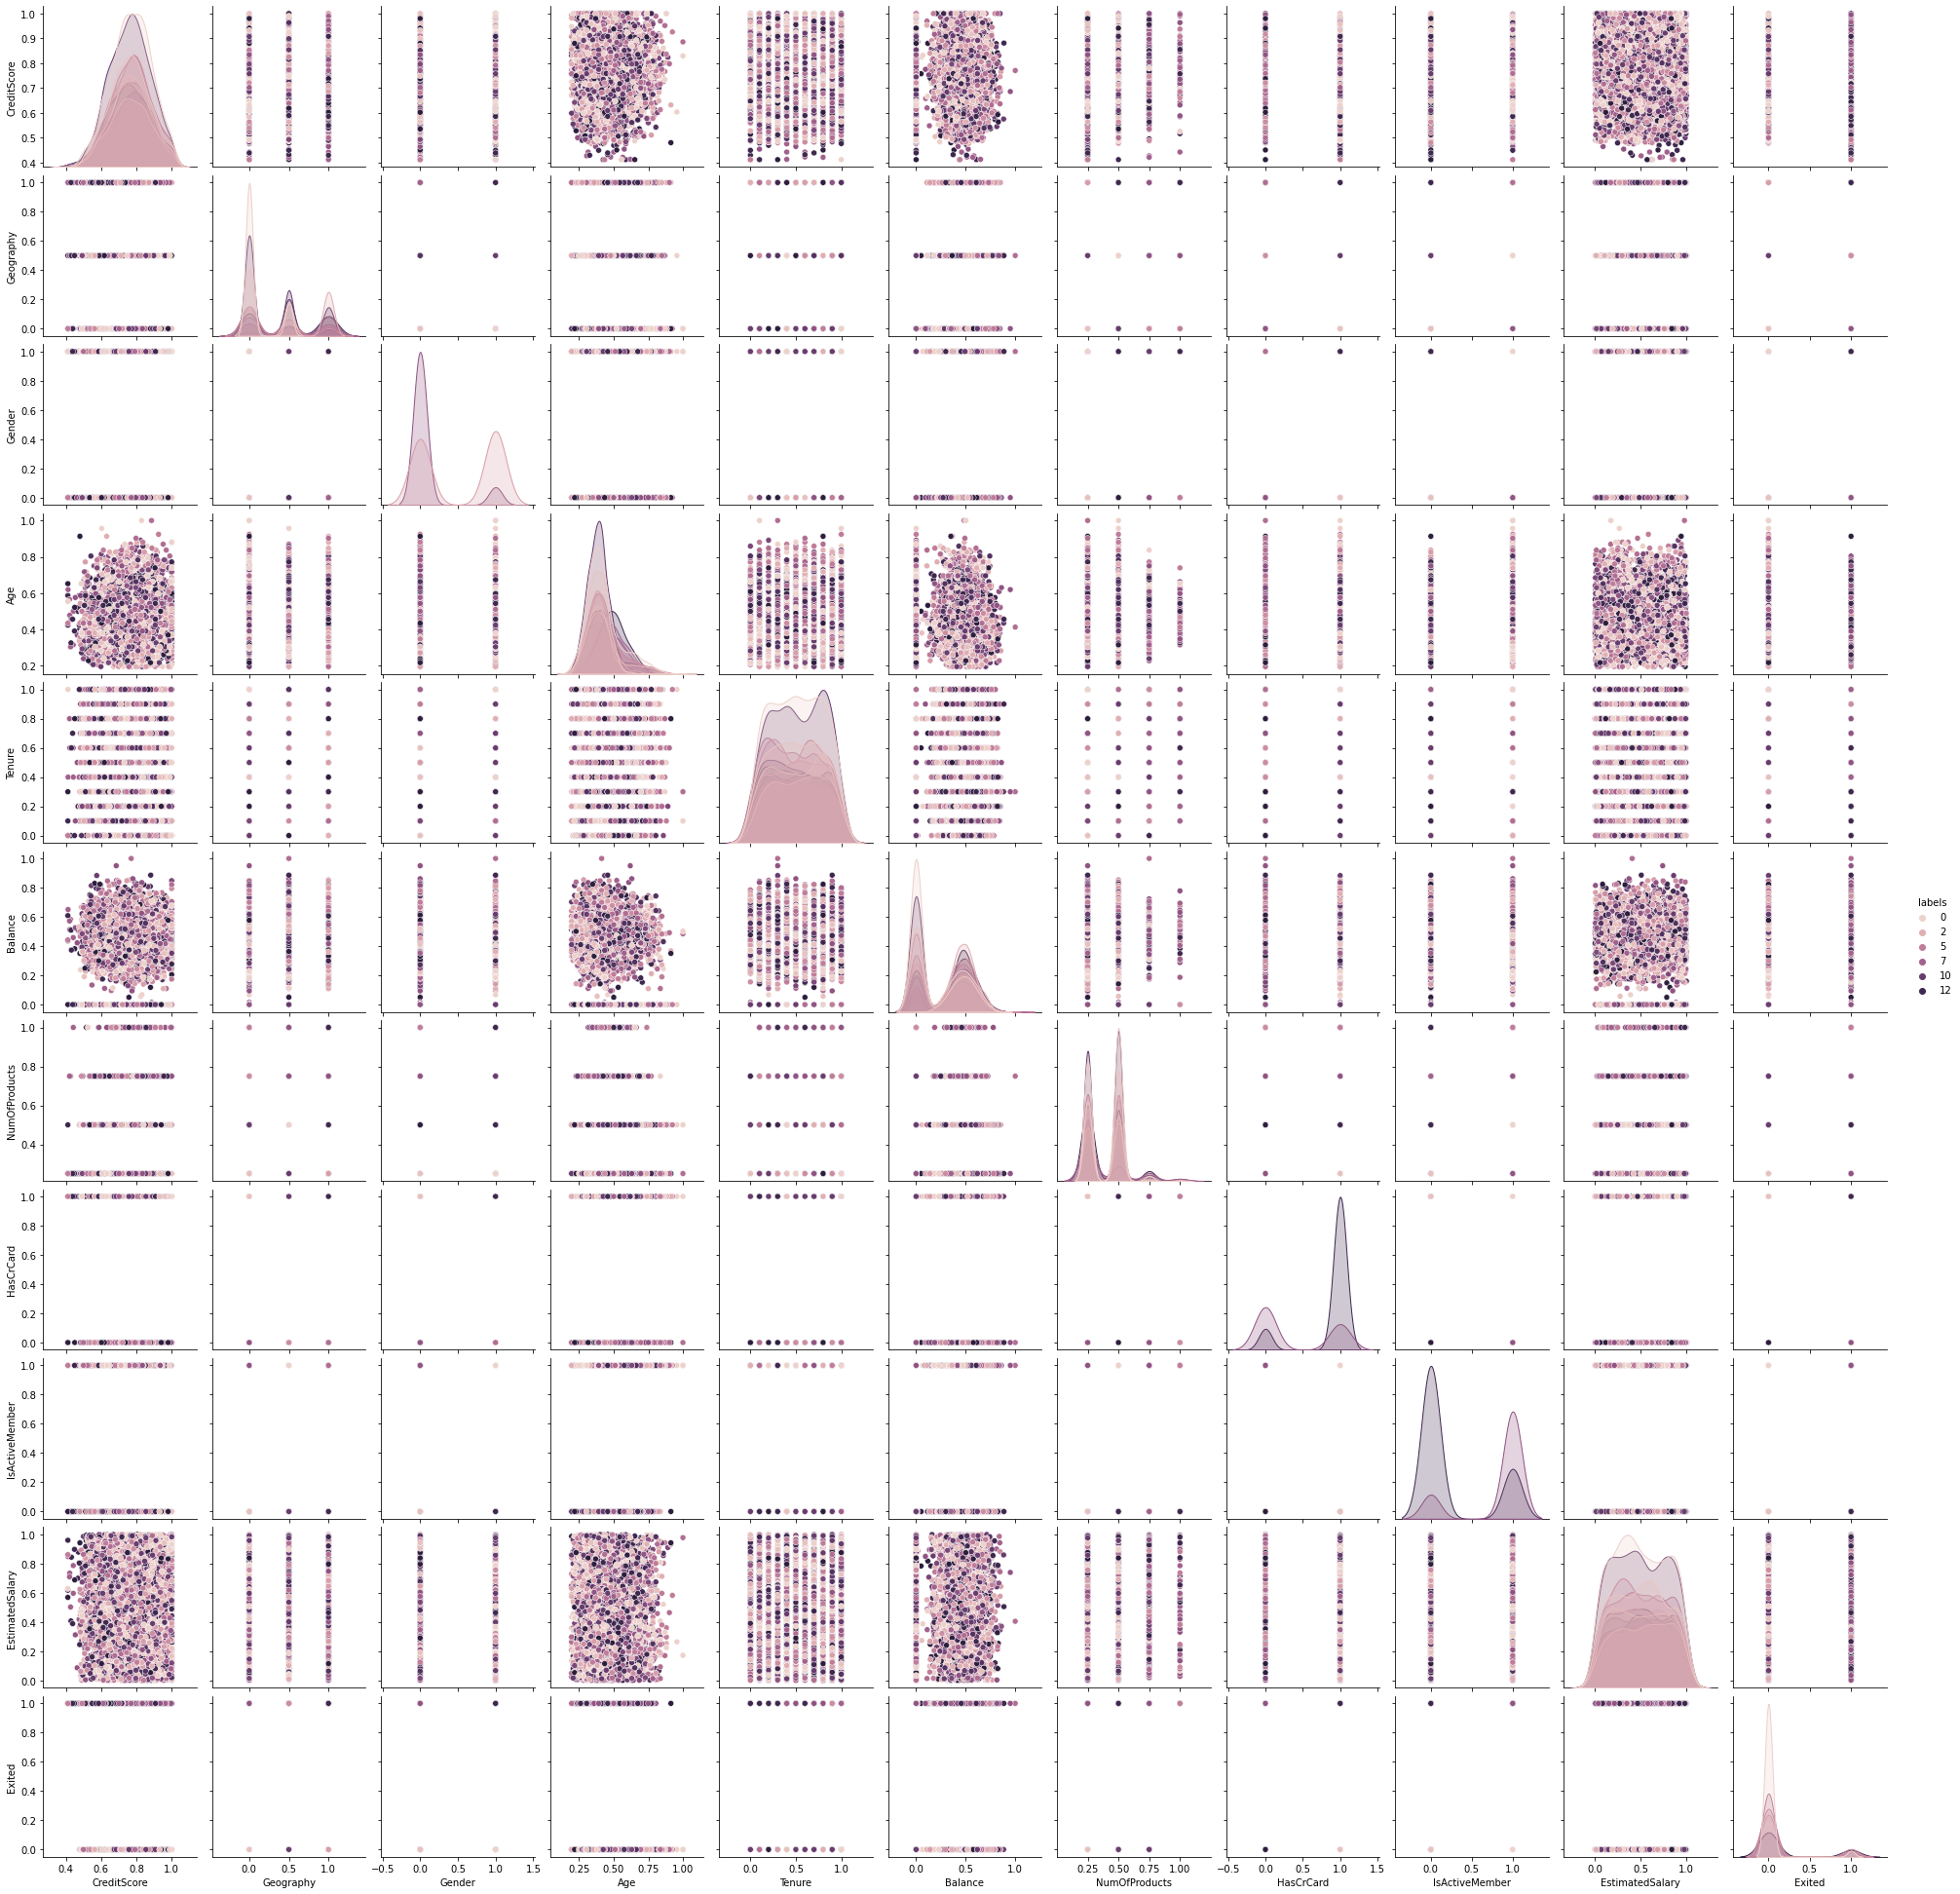

In [133]:

features = df_bank_churn[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
                          'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                          'EstimatedSalary','Exited']]

mixmax = preprocessing.MinMaxScaler()
features_normal = mixmax.fit_transform(features)

kmeans = KMeans(n_clusters=14).fit(features_normal)
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

sns.pairplot(labeled,hue='labels')


## EM

For component=2, The Silhouette Coefficient is 0.20819117591532257
For component=2, The homogeneity_score is 0.024316028117493612
For component=2, The log_likelihood score is 4.154582554148366
For component=3, The Silhouette Coefficient is 0.14484097119680858
For component=3, The homogeneity_score is 0.042830018771013396
For component=3, The log_likelihood score is -0.18913640490543301
For component=4, The Silhouette Coefficient is 0.20417395107401604
For component=4, The homogeneity_score is 0.04099893866868091
For component=4, The log_likelihood score is 7.891617975605538
For component=5, The Silhouette Coefficient is 0.2016395690818053
For component=5, The homogeneity_score is 0.03400217214590231
For component=5, The log_likelihood score is 10.742532968999983
For component=6, The Silhouette Coefficient is 0.2347623393147122
For component=6, The homogeneity_score is 0.03581153165354709
For component=6, The log_likelihood score is 12.472139791987384
For component=7, The Silhouette Coe

Text(0, 0.5, 'log_likelihood Score')

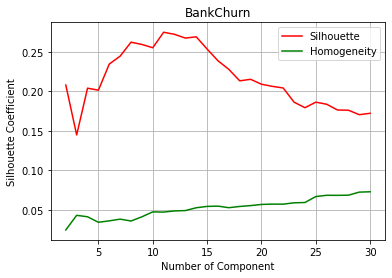

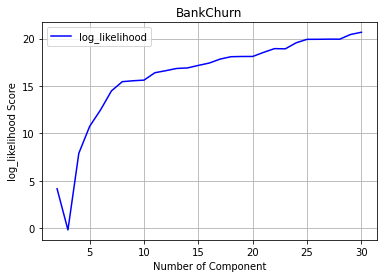

In [140]:
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name)
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

In [144]:
df_bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.728235,0.0,0.0,0.456522,0.2,0.000000,0.25,1.0,1.0,0.506763,1
1,0.715294,0.5,0.0,0.445652,0.1,0.334031,0.25,0.0,1.0,0.562734,0
2,0.590588,0.0,0.0,0.456522,0.8,0.636357,0.75,1.0,0.0,0.569679,1
3,0.822353,0.0,0.0,0.423913,0.1,0.000000,0.50,0.0,0.0,0.469151,0
4,1.000000,0.5,0.0,0.467391,0.2,0.500246,0.25,1.0,1.0,0.395435,0


In [378]:
df_bc_x = df_bank_churn.drop("Exited",1)

# Dimensionality reduction algorithms:

2 pd dataframe
                        0         1
CreditScore     -0.004138  0.004647
Geography        0.056044  0.009879
Gender          -0.636129 -0.768955
Age             -0.010901  0.018884
Tenure           0.011074 -0.027835
Balance          0.010140 -0.008263
NumOfProducts    0.001545  0.007666
HasCrCard        0.027529 -0.077853
IsActiveMember  -0.768725  0.633458
EstimatedSalary  0.011814 -0.000387
3 pd dataframe
                        0         1         2
CreditScore     -0.004138  0.004647  0.000860
Geography        0.056044  0.009879 -0.009337
Gender          -0.636129 -0.768955  0.042465
Age             -0.010901  0.018884  0.000950
Tenure           0.011074 -0.027835 -0.020873
Balance          0.010140 -0.008263  0.010635
NumOfProducts    0.001545  0.007666 -0.002394
HasCrCard        0.027529 -0.077853 -0.996154
IsActiveMember  -0.768725  0.633458 -0.071512
EstimatedSalary  0.011814 -0.000387  0.010816
4 pd dataframe
                        0         1         2        

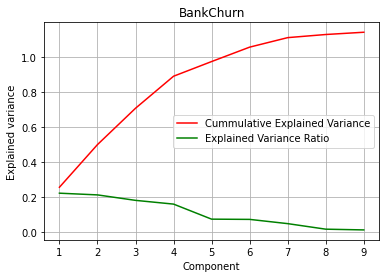

In [373]:
for dim in list(range(2,10,1)):
    pca = PCA(n_components=dim, svd_solver='full',random_state=seed)
    pca.fit_transform(df_bc_x.values)
    
    # reconstruction
    x_prime = pca.fit_transform(df_bc_x.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(df_bc_x.values, reconstructed)    
    print(dim, "pd dataframe")
    print(pd.DataFrame(pca.components_.T, index=df_bc_x.columns))
        
    #print(dim, ": ", round(pca.explained_variance_ratio_.sum(),5), rc_err, pca.explained_variance_.sum())
    
plt.figure()
plt.grid()
plt.title(ds_name)
plt.plot(np.arange(1, pca.explained_variance_.size + 1), np.cumsum(pca.explained_variance_), 'r', label="Cummulative Explained Variance")
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_,'g', label='Explained Variance Ratio')
plt.xlabel('Component')
plt.ylabel('Explained variance')
plt.legend()
pca_for_clus = PCA(n_components=5, svd_solver='full',random_state=seed)
pca_result =  pca_for_clus.fit_transform(df_bc_x.values)


Best Component: 7


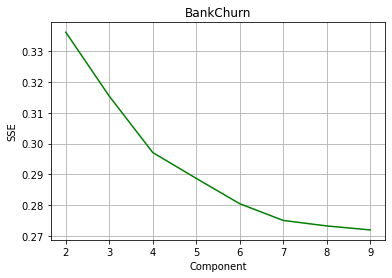

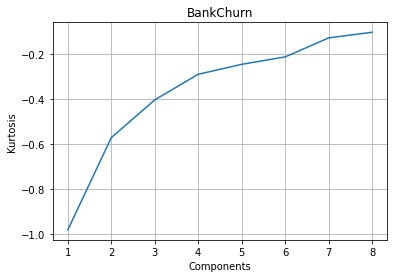

In [348]:
rc_errors = {}
kv = []
for dim in range(2,10):
    ica = FastICA(n_components=dim, random_state=seed)
    x_prime = ica.fit_transform(df_bc_x.values)
    kur = scipy.stats.kurtosis(x_prime)
    kv.append(np.mean(kur)/dim)
kv = np.array(kv)
optimalComponents = np.argmax(kv)
    
print('Best Component: %d' % optimalComponents)

rc_errors = {}
for dim in list(range(2,10,1)):
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(df_bc_x.values)
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(df_bc_x.values, reconstructed)    
    rc_errors[dim] = rc_err
    
plt.figure()
plt.grid()
plt.title(ds_name)
plt.plot(list(rc_errors.keys()), list(rc_errors.values()),'g')
plt.xlabel("Component")
plt.ylabel("SSE")
plt.show()

plt.figure()
plt.grid()
plt.title(ds_name)
plt.plot(np.arange(1, 9), kv)
plt.xlabel("Components")
plt.ylabel("Kurtosis")
plt.show()
ica = FastICA(n_components=7, random_state=seed)
ica_result = ica.fit_transform(df_bc_x.values)

Total Number of Features: 10
Best Number of RP Components: 2


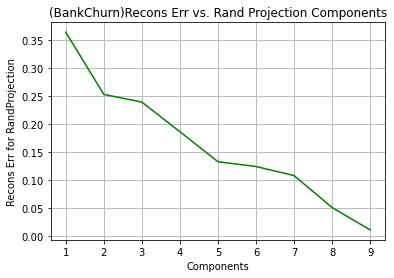

In [386]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,10):
    mean_mse = []
    for j in range(0,500):
        rp = GaussianRandomProjection(n_components=i,random_state=seed)
        rp = rp.fit(df_bc_x)
        w = rp.components_
        p = pinv(w)
        reconstructed = ((p@w)@(df_bc_x.T)).T
        mean_mse.append(mean_squared_error(df_bc_x, reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
optimalComponents = np.argmax(reconstruction_error)
 
print('Total Number of Features:', df_bc_x.shape[1])
print('Best Number of RP Components:', optimalComponents+2)

plt.plot(np.arange(1,10),reconstruction_error,'g')
plt.fill_between(np.arange(1,10),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Recons Err for RandProjection')
plt.title('(BankChurn)Recons Err vs. Rand Projection Components')
plt.grid()
plt.show()
rand_p = GaussianRandomProjection(n_components=2)
rand_p_result = rand_p.fit_transform(df_bc_x.values)

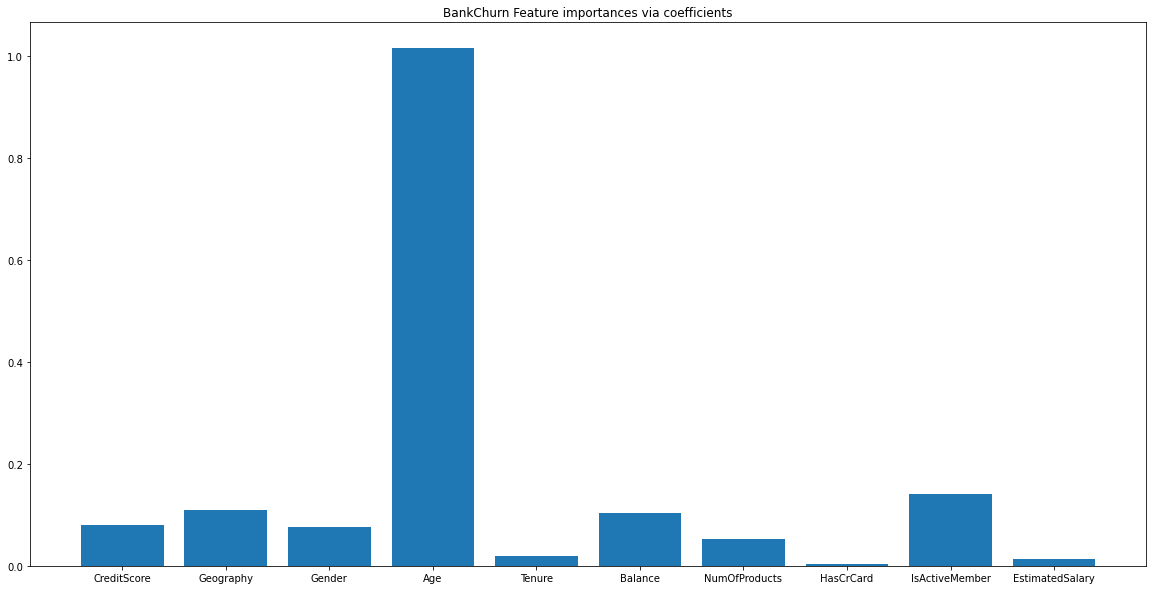

In [349]:
ridge = RidgeCV(alphas=np.logspace(-10, 10, num=5)).fit(df_bc_x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(df_bc_x.columns)
plt.figure(figsize=(20,10))
plt.bar(height=importance, x=feature_names)
plt.title(ds_name + " Feature importances via coefficients")
plt.show()

## PCA ( EM, K-MEANS )

Kmean-clusters=2,Silhouette Coefficient is 0.2690786278725231
Kmean-clusters=2,homogeneity_score is 0.024316028117493612
Kmean-clusters=3,Silhouette Coefficient is 0.2879570849936237
Kmean-clusters=3,homogeneity_score is 0.021405107710557904
Kmean-clusters=4,Silhouette Coefficient is 0.35760583238207566
Kmean-clusters=4,homogeneity_score is 0.03506737600356141
Kmean-clusters=5,Silhouette Coefficient is 0.3577919949318953
Kmean-clusters=5,homogeneity_score is 0.033494419359924824
Kmean-clusters=6,Silhouette Coefficient is 0.40573631285485096
Kmean-clusters=6,homogeneity_score is 0.03279949171146341
Kmean-clusters=7,Silhouette Coefficient is 0.4419414578968512
Kmean-clusters=7,homogeneity_score is 0.03401261759342889
Kmean-clusters=8,Silhouette Coefficient is 0.47386273323563255
Kmean-clusters=8,homogeneity_score is 0.03596159003662832
Kmean-clusters=9,Silhouette Coefficient is 0.4513073650672636
Kmean-clusters=9,homogeneity_score is 0.03793240221394138
Kmean-clusters=10,Silhouette Coeff

For component=26, The Silhouette Coefficient is 0.3554919948751236
For component=26, The homogeneity_score is 0.06440547453778477
For component=26, The log_likelihood score is 11.435056949698058
For component=27, The Silhouette Coefficient is 0.40427128658463884
For component=27, The homogeneity_score is 0.06379493258804961
For component=27, The log_likelihood score is 11.444206948130615
For component=28, The Silhouette Coefficient is 0.39778637840406683
For component=28, The homogeneity_score is 0.0638486779657393
For component=28, The log_likelihood score is 11.451130267669935
For component=29, The Silhouette Coefficient is 0.39310513884878157
For component=29, The homogeneity_score is 0.06400370274384391
For component=29, The log_likelihood score is 11.45585507173466
For component=30, The Silhouette Coefficient is 0.389822948089746
For component=30, The homogeneity_score is 0.06401442053086627
For component=30, The log_likelihood score is 11.460072364230108
Max EM silhouette is: 0.4

Text(0, 0.5, 'log_likelihood Score')

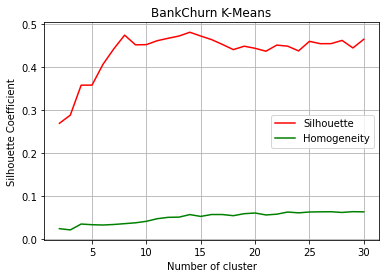

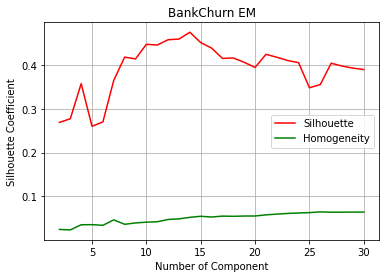

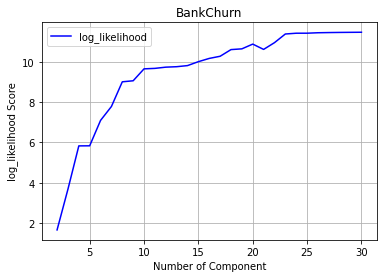

In [395]:
silh = {}
homog = {}
adj = {}
X = pca_result
for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("Kmean-clusters={},Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("Kmean-clusters={},homogeneity_score is {}".format(cluster, homog_score))
    
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.grid()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + " EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## ICA ( EM, K-MEANS )

For n_clusters=2, The Silhouette Coefficient is 0.16970687382476776
For n_clusters=2, The homogeneity_score is 5.0237806935510165e-05
For n_clusters=3, The Silhouette Coefficient is 0.15557941888367913
For n_clusters=3, The homogeneity_score is 0.021405107710557904
For n_clusters=4, The Silhouette Coefficient is 0.14699855565824313
For n_clusters=4, The homogeneity_score is 0.021633951883254024
For n_clusters=5, The Silhouette Coefficient is 0.133854252653444
For n_clusters=5, The homogeneity_score is 0.019347173612249042
For n_clusters=6, The Silhouette Coefficient is 0.15837516932822146
For n_clusters=6, The homogeneity_score is 0.03254695788390748
For n_clusters=7, The Silhouette Coefficient is 0.1661048314624506
For n_clusters=7, The homogeneity_score is 0.038352222533225434
For n_clusters=8, The Silhouette Coefficient is 0.16775531056341655
For n_clusters=8, The homogeneity_score is 0.04466081804900509
For n_clusters=9, The Silhouette Coefficient is 0.18277284217416867
For n_clust

For component=24, The Silhouette Coefficient is 0.21671888203965756
For component=24, The homogeneity_score is 0.0613440683436749
For component=24, The log_likelihood score is 29.673180810825755
For component=25, The Silhouette Coefficient is 0.22236520018331993
For component=25, The homogeneity_score is 0.060623995633824916
For component=25, The log_likelihood score is 29.65954866181215
For component=26, The Silhouette Coefficient is 0.22128569742578388
For component=26, The homogeneity_score is 0.06058840510112646
For component=26, The log_likelihood score is 29.575229739258862
For component=27, The Silhouette Coefficient is 0.2231030310433857
For component=27, The homogeneity_score is 0.06183550529260266
For component=27, The log_likelihood score is 29.725367630637972
For component=28, The Silhouette Coefficient is 0.20655087060289243
For component=28, The homogeneity_score is 0.062384931471529854
For component=28, The log_likelihood score is 29.656755802051713
For component=29, The

Text(0, 0.5, 'log_likelihood Score')

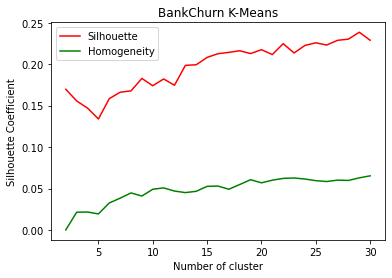

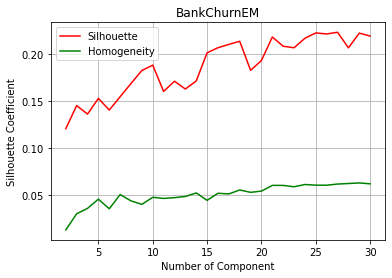

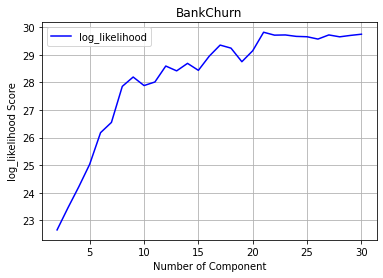

In [396]:
##ICA
silh = {}
homog = {}
adj = {}

X = ica_result

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + "EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## Randomized Projections ( EM, K-MEANS )

For n_clusters=2, The Silhouette Coefficient is 0.49644396380888445
For n_clusters=2, The homogeneity_score is 0.0031887165742578794
For n_clusters=3, The Silhouette Coefficient is 0.3719904756352388
For n_clusters=3, The homogeneity_score is 0.0004765214643861952
For n_clusters=4, The Silhouette Coefficient is 0.33792141974220685
For n_clusters=4, The homogeneity_score is 0.003104329308540683
For n_clusters=5, The Silhouette Coefficient is 0.32959394845717077
For n_clusters=5, The homogeneity_score is 0.00478548318321905
For n_clusters=6, The Silhouette Coefficient is 0.3454683990990906
For n_clusters=6, The homogeneity_score is 0.00460454904719066
For n_clusters=7, The Silhouette Coefficient is 0.33712452824380035
For n_clusters=7, The homogeneity_score is 0.004362363079549864
For n_clusters=8, The Silhouette Coefficient is 0.3396299742419181
For n_clusters=8, The homogeneity_score is 0.005380688074473669
For n_clusters=9, The Silhouette Coefficient is 0.3307048870236388
For n_cluste

For component=24, The Silhouette Coefficient is 0.3210102380887947
For component=24, The homogeneity_score is 0.010092410878074476
For component=24, The log_likelihood score is -2.250572101122446
For component=25, The Silhouette Coefficient is 0.32442153572464644
For component=25, The homogeneity_score is 0.010768702162925504
For component=25, The log_likelihood score is -2.250194955299324
For component=26, The Silhouette Coefficient is 0.3217097343621425
For component=26, The homogeneity_score is 0.010753930807485273
For component=26, The log_likelihood score is -2.2497431268308117
For component=27, The Silhouette Coefficient is 0.3295244041178621
For component=27, The homogeneity_score is 0.009923651294164356
For component=27, The log_likelihood score is -2.2481841999911807
For component=28, The Silhouette Coefficient is 0.3296337247493577
For component=28, The homogeneity_score is 0.009354925485498504
For component=28, The log_likelihood score is -2.2477130942012087
For component=29

Text(0, 0.5, 'log_likelihood Score')

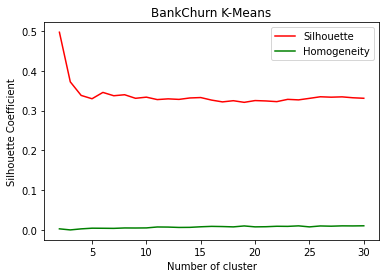

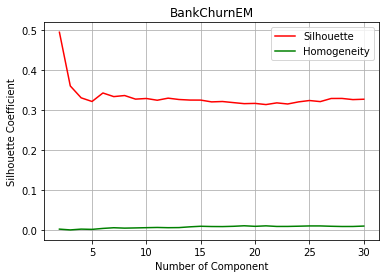

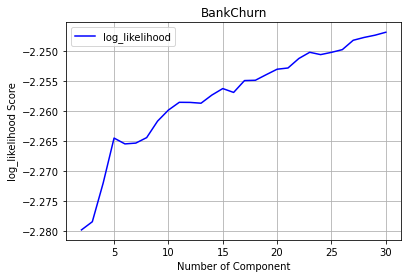

In [397]:
##PCA
silh = {}
homog = {}
adj = {}

X = rand_p_result

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + "EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## Feature Importance via coefficients ( EM, K-MEANS )

In [398]:
df_bc_imp = df_bank_churn[['CreditScore','Age','IsActiveMember','Geography']]
df_bc_imp.head()

,CreditScore,Age,IsActiveMember,Geography
0,0.728235,0.456522,1.0,0.0
1,0.715294,0.445652,1.0,0.5
2,0.590588,0.456522,0.0,0.0
3,0.822353,0.423913,0.0,0.0
4,1.000000,0.467391,1.0,0.5


For n_clusters=2, The Silhouette Coefficient is 0.5024680074180727
For n_clusters=2, The homogeneity_score is 0.024316028117493612
For n_clusters=3, The Silhouette Coefficient is 0.48662863065863177
For n_clusters=3, The homogeneity_score is 0.0275609531697003
For n_clusters=4, The Silhouette Coefficient is 0.5312416257796146
For n_clusters=4, The homogeneity_score is 0.03558859875972847
For n_clusters=5, The Silhouette Coefficient is 0.5192341419290265
For n_clusters=5, The homogeneity_score is 0.04322707410108624
For n_clusters=6, The Silhouette Coefficient is 0.5088044685271758
For n_clusters=6, The homogeneity_score is 0.05191803444004879
For n_clusters=7, The Silhouette Coefficient is 0.4700832842021125
For n_clusters=7, The homogeneity_score is 0.05239861425610172
For n_clusters=8, The Silhouette Coefficient is 0.43872021568473313
For n_clusters=8, The homogeneity_score is 0.05256753738258952
For n_clusters=9, The Silhouette Coefficient is 0.4212834244419704
For n_clusters=9, The

For component=25, The Silhouette Coefficient is 0.33493226308828494
For component=25, The homogeneity_score is 0.1097165613171495
For component=25, The log_likelihood score is 11.11345450376628
For component=26, The Silhouette Coefficient is 0.3292784950559178
For component=26, The homogeneity_score is 0.11054011014994602
For component=26, The log_likelihood score is 11.113710011744242
For component=27, The Silhouette Coefficient is 0.33186415153656273
For component=27, The homogeneity_score is 0.12274308845664074
For component=27, The log_likelihood score is 11.115462500296443
For component=28, The Silhouette Coefficient is 0.3332903043624555
For component=28, The homogeneity_score is 0.1233575751851383
For component=28, The log_likelihood score is 11.11577727748371
For component=29, The Silhouette Coefficient is 0.32265253670427546
For component=29, The homogeneity_score is 0.12615740270646533
For component=29, The log_likelihood score is 11.116268514891427
For component=30, The Silh

Text(0, 0.5, 'log_likelihood Score')

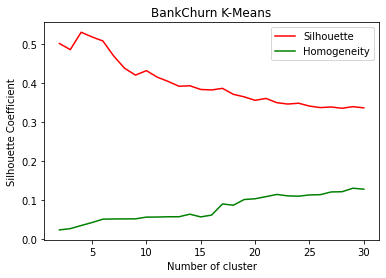

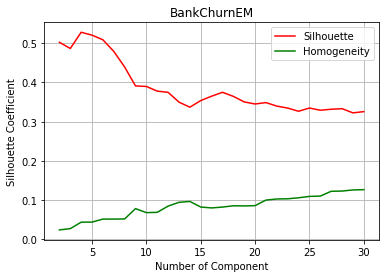

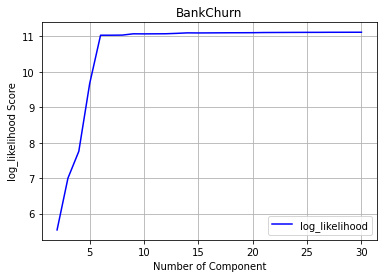

In [399]:
silh = {}
homog = {}
adj = {}

## select only two high coeff features
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bc_imp)

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + "EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## Neural Network on Dim

In [450]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import scikitplot as skplt
import scikitplot.estimators as est

[[4615  168]
 [ 638  579]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4783
           1       0.78      0.48      0.59      1217

    accuracy                           0.87      6000
   macro avg       0.83      0.72      0.75      6000
weighted avg       0.86      0.87      0.85      6000

adam Accuracy of train neural network is 86.57%
[[3052  128]
 [ 444  376]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3180
           1       0.75      0.46      0.57       820

    accuracy                           0.86      4000
   macro avg       0.81      0.71      0.74      4000
weighted avg       0.85      0.86      0.84      4000

adam Accuracy of test neural network is 85.70%
Time taken relu-adam:  11.605130434036255


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_

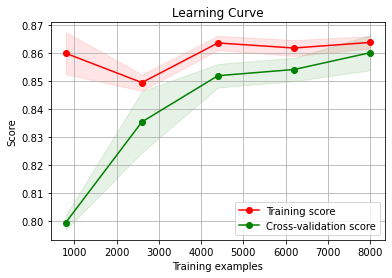

C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_

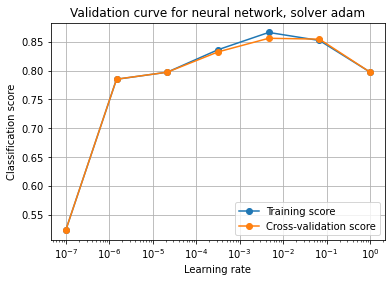

In [451]:
#Main Ds

X = df_bank_churn[predictors].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=seed)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=seed)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    if sol == 'adam':
        est.plot_learning_curve(mlp, X, y)
        plt.show()
    if sol == 'adam' or sol == 'sgd':
        lr_range = np.logspace(-7, 0, 7)
        train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
                                                     cv=5)

        plt.figure()
        plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
        plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
        plt.title('Validation curve for neural network, solver '+sol)
        plt.xlabel('Learning rate')
        plt.ylabel("Classification score")
        plt.legend(loc="best")
        plt.grid()

[[4723    0]
 [1277    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4723
           1       0.00      0.00      0.00      1277

    accuracy                           0.79      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.79      0.69      6000

adam Accuracy of train neural network is 78.72%
[[3240    0]
 [ 760    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3240
           1       0.00      0.00      0.00       760

    accuracy                           0.81      4000
   macro avg       0.41      0.50      0.45      4000
weighted avg       0.66      0.81      0.72      4000

adam Accuracy of test neural network is 81.00%
Time taken relu-adam:  1.7623484134674072


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\

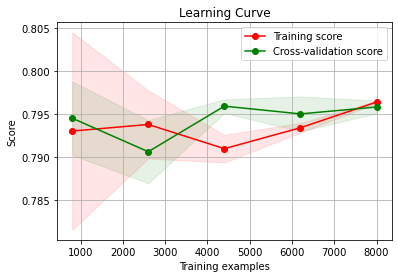

C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_

In [452]:
#PCA
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.40, random_state=1111)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=1111)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, pca_result, y)
    plt.show()
#     lr_range = np.logspace(-7, 0, 7)
#     train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
#                                                  cv=5)
#     plt.figure()
#     plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
#     plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
#     plt.title('Validation curve for neural network, solver '+sol)
#     plt.xlabel('Learning rate')
#     plt.ylabel("Classification score")
#     plt.legend(loc="best")
#     plt.grid()

[[4778    0]
 [1222    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4778
           1       0.00      0.00      0.00      1222

    accuracy                           0.80      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.80      0.71      6000

adam Accuracy of train neural network is 79.63%
[[3185    0]
 [ 815    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3185
           1       0.00      0.00      0.00       815

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.63      0.80      0.71      4000

adam Accuracy of test neural network is 79.62%
Time taken relu-adam:  2.7489171028137207


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\

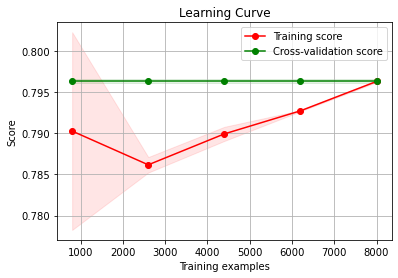

In [453]:
#ICA
X_train, X_test, y_train, y_test = train_test_split(ica_result, y, test_size=0.40, random_state=79)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=79)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, ica_result, y)
    plt.show()
#     lr_range = np.logspace(-7, 0, 7)
#     train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
#                                                  cv=5)
#     plt.figure()
#     plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
#     plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
#     plt.title('Validation curve for neural network, solver '+sol)
#     plt.xlabel('Learning rate')
#     plt.ylabel("Classification score")
#     plt.legend(loc="best")
#     plt.grid()

[[4785    0]
 [1215    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4785
           1       0.00      0.00      0.00      1215

    accuracy                           0.80      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.64      0.80      0.71      6000

adam Accuracy of train neural network is 79.75%
[[3178    0]
 [ 822    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      3178
           1       0.00      0.00      0.00       822

    accuracy                           0.79      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.63      0.79      0.70      4000

adam Accuracy of test neural network is 79.45%
Time taken relu-adam:  0.8759033679962158


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\

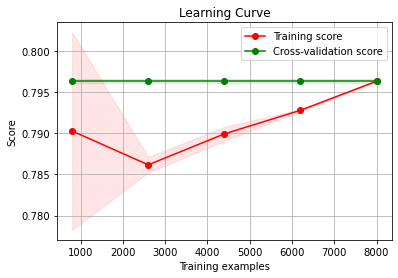

In [454]:
#Random Projection
X_train, X_test, y_train, y_test = train_test_split(rand_p_result, y, test_size=0.40, random_state=78)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=78)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, rand_p_result, y)
    plt.show()
#     lr_range = np.logspace(-7, 0, 7)
#     train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
#                                                  cv=5)
#     plt.figure()
#     plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
#     plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
#     plt.title('Validation curve for neural network, solver '+sol)
#     plt.xlabel('Learning rate')
#     plt.ylabel("Classification score")
#     plt.legend(loc="best")
#     plt.grid()

[[4644  139]
 [ 840  377]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      4783
           1       0.73      0.31      0.44      1217

    accuracy                           0.84      6000
   macro avg       0.79      0.64      0.67      6000
weighted avg       0.82      0.84      0.81      6000

adam Accuracy of train neural network is 83.68%
[[3082   98]
 [ 587  233]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3180
           1       0.70      0.28      0.40       820

    accuracy                           0.83      4000
   macro avg       0.77      0.63      0.65      4000
weighted avg       0.81      0.83      0.80      4000

adam Accuracy of test neural network is 82.88%
Time taken relu-adam:  1.1724865436553955


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


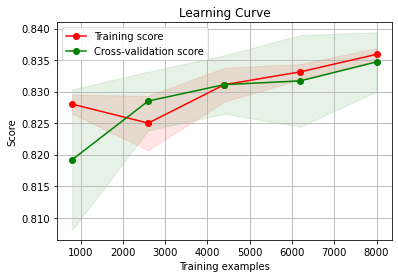

C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_

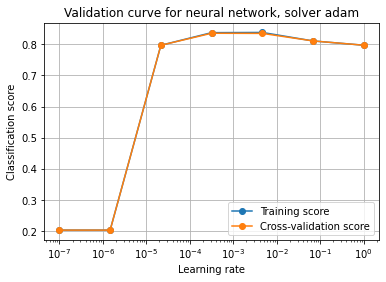

In [410]:
## Important feature
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bc_imp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=seed)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=seed)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, X, y)
    plt.show()
    lr_range = np.logspace(-7, 0, 7)
    train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
                                                 cv=5)
    plt.figure()
    plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
    plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
    plt.title('Validation curve for neural network, solver '+sol)
    plt.xlabel('Learning rate')
    plt.ylabel("Classification score")
    plt.legend(loc="best")
    plt.grid()

## Neural Network  Cluster

[[4783    0]
 [1217    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4783
           1       0.00      0.00      0.00      1217

    accuracy                           0.80      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.64      0.80      0.71      6000

adam Accuracy of train neural network is 79.72%
[[3180    0]
 [ 820    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3180
           1       0.00      0.00      0.00       820

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.63      0.80      0.70      4000

adam Accuracy of test neural network is 79.50%
Time taken relu-adam:  3.9454238414764404


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\

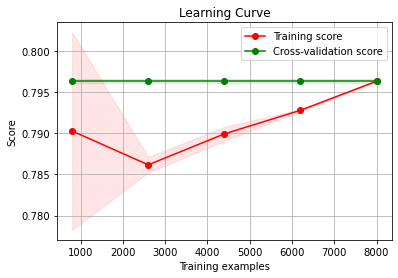

C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_

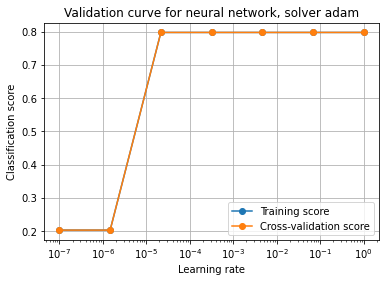

In [455]:


# silh = {}
# homog = {}
# adj = {}

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bank_churn[predictors].values)

kmeans = KMeans(n_clusters=14, max_iter=500, random_state=seed).fit(X)
label = kmeans.labels_
X_kmeans = label.reshape(10000,1)
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y, test_size=0.40, random_state=seed)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=seed)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, X_kmeans, y)
    plt.show()
    lr_range = np.logspace(-7, 0, 7)
    train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
                                                 cv=5)
    plt.figure()
    plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
    plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
    plt.title('Validation curve for neural network, solver '+sol)
    plt.xlabel('Learning rate')
    plt.ylabel("Classification score")
    plt.legend(loc="best")
    plt.grid()





[[4761    0]
 [1239    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4761
           1       0.00      0.00      0.00      1239

    accuracy                           0.79      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.79      0.70      6000

adam Accuracy of train neural network is 79.35%
[[3202    0]
 [ 798    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3202
           1       0.00      0.00      0.00       798

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.64      0.80      0.71      4000

adam Accuracy of test neural network is 80.05%
Time taken relu-adam:  0.7478082180023193


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\

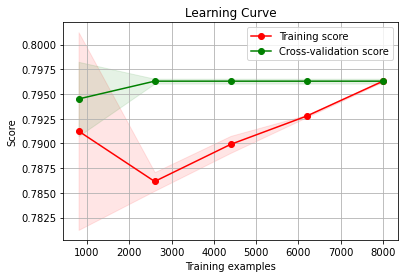

In [459]:
#EM

# silh = {}
# homog = {}
# adj = {}

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bank_churn[predictors].values)

em = GaussianMixture(n_components=14, max_iter=500, random_state=seed).fit(X)
label = em.predict_proba(X)
X_train, X_test, y_train, y_test = train_test_split(label, y, test_size=0.40, random_state=123)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=132)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, label, y)
    plt.show()
#     lr_range = np.logspace(-7, 0, 7)
#     train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
#                                                  cv=5)
#     plt.figure()
#     plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
#     plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
#     plt.title('EM Validation curve for neural network, solver '+sol)
#     plt.xlabel('Learning rate')
#     plt.ylabel("Classification score")
#     plt.legend(loc="best")
#     plt.grid()





# Add Feature K Means

[[4546  237]
 [ 582  635]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4783
           1       0.73      0.52      0.61      1217

    accuracy                           0.86      6000
   macro avg       0.81      0.74      0.76      6000
weighted avg       0.85      0.86      0.85      6000

adam Accuracy of train neural network is 86.35%
[[3006  174]
 [ 401  419]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3180
           1       0.71      0.51      0.59       820

    accuracy                           0.86      4000
   macro avg       0.79      0.73      0.75      4000
weighted avg       0.85      0.86      0.85      4000

adam Accuracy of test neural network is 85.62%
Time taken relu-adam:  5.9125330448150635


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


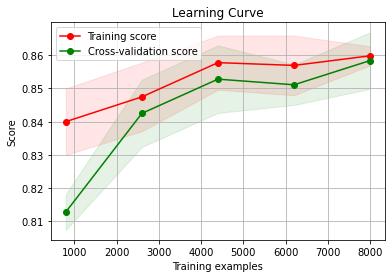

In [457]:
#add feature Kmeans

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bank_churn[predictors].values)

kmeans = KMeans(n_clusters=14, max_iter=500, random_state=seed).fit(X)
kmeans.fit_transform(X)
X_kmeans = np.append(X, kmeans.fit_transform(X), 1)

X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y, test_size=0.40, random_state=seed)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=seed)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, X_kmeans, y)
    plt.show()
#     lr_range = np.logspace(-7, 0, 7)
#     train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
#                                                  cv=5)
#     plt.figure()
#     plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
#     plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
#     plt.title('Validation curve for neural network, solver '+sol)
#     plt.xlabel('Learning rate')
#     plt.ylabel("Classification score")
#     plt.legend(loc="best")
#     plt.grid()


## Add Feature EM

[[4575  208]
 [ 566  651]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4783
           1       0.76      0.53      0.63      1217

    accuracy                           0.87      6000
   macro avg       0.82      0.75      0.77      6000
weighted avg       0.86      0.87      0.86      6000

adam Accuracy of train neural network is 87.10%
[[3013  167]
 [ 409  411]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3180
           1       0.71      0.50      0.59       820

    accuracy                           0.86      4000
   macro avg       0.80      0.72      0.75      4000
weighted avg       0.85      0.86      0.85      4000

adam Accuracy of test neural network is 85.60%
Time taken relu-adam:  4.681941032409668


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\neural_network\_

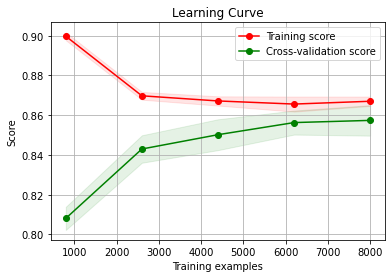

In [458]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bank_churn[predictors].values)

em = GaussianMixture(n_components=14, max_iter=500, random_state=seed).fit(X)
label = em.predict_proba(X)

X_em = np.append(X, label, 1)

X_train, X_test, y_train, y_test = train_test_split(X_em, y, test_size=0.40, random_state=seed)

solvers_arr = ['adam']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=seed)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    est.plot_learning_curve(mlp, X_em, y)
    plt.show()
#     lr_range = np.logspace(-7, 0, 7)
#     train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
#                                                  cv=5)
#     plt.figure()
#     plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
#     plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
#     plt.title('EM Validation curve for neural network, solver '+sol)
#     plt.xlabel('Learning rate')
#     plt.ylabel("Classification score")
#     plt.legend(loc="best")
#     plt.grid()

In [443]:
print(X_em.shape)

(10000, 24)


In [445]:
print(X_kmeans.shape)

(10000, 24)


In [448]:
print(label.shape)

(10000, 14)
